# Training an RNN to classify MNIST digits

## Creating The Recurrent Neural Network Architecture

In [1]:
import tensorflow as tf

steps   = 28
indims  = 28
neurons = 150
outdims = 10

input_layer  = tf.keras.layers.Input(shape = (steps, indims))
_, states    = tf.keras.layers.SimpleRNN(neurons, return_state = True)(input_layer)
output_layer = tf.keras.layers.Dense(outdims, activation = 'softmax')(states)

rnn_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
rnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


## Import and Display The Dataset

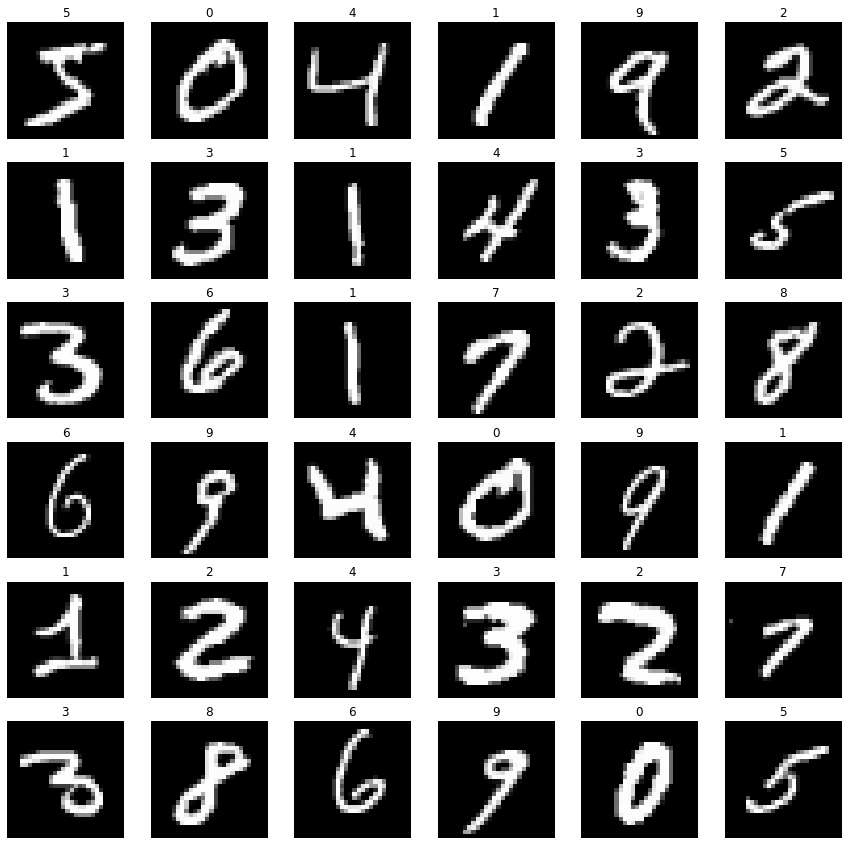

In [3]:
import matplotlib.pyplot as plt
import numpy as np

mnist_dataset = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()
X_train, X_test = X_train / 255, X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test  = tf.keras.utils.to_categorical(y_test)

fig, axes = plt.subplots(6, 6, figsize = (15, 15))

samples = np.array([
    [0,  1,  2,  3,   4,  5],
    [6,  7,  8,  9,  10, 11],
    [12, 13, 14, 15, 16, 17],
    [18, 19, 20, 21, 22, 23],
    [24, 25, 26, 27, 28, 29],
    [30, 31, 32, 33, 34, 35]
])

for row in range(0, 6):
    for col in range(0, 6):
        current_image = X_train[samples[row, col]]
        axes[row, col].set_title(str(y_train[samples[row, col]].argmax()))
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image, cmap = 'gray')

plt.show()

## Training the RNN

In [4]:
train_log = rnn_model.fit(X_train, y_train, epochs = 5, batch_size = 150, validation_split = 0.2, verbose = 0)
_, rnn_model_accuracy = rnn_model.evaluate(X_test, y_test, verbose = 0)
print("accuracy: ", rnn_model_accuracy)

accuracy:  0.9629


## Plotting the Results

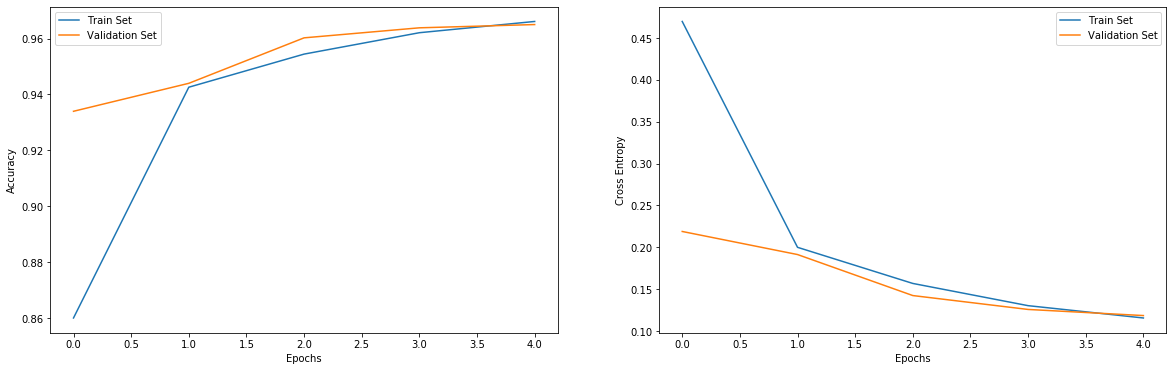

In [5]:
fig = plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.plot([i for i in range(5)], train_log.history['accuracy'], label = 'Train Set')
plt.plot([i for i in range(5)], train_log.history['val_accuracy'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i for i in range(5)], train_log.history['loss'], label = 'Train Set')
plt.plot([i for i in range(5)], train_log.history['val_loss'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.legend()

plt.show()